# Ex 1

In [1]:
install.packages('mlbench')


The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpuQbICL/downloaded_packages


In [152]:
library(mlbench)
library(moments)
library(ggplot2)
library(gridExtra)
library(ggExtra)
library(tidyverse)
library(xlsx)

In [7]:
df = PimaIndiansDiabetes
head(df, 10)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg
7,3,78,50,32,88,31.0,0.248,26,pos
8,10,115,0,0,0,35.3,0.134,29,neg
9,2,197,70,45,543,30.5,0.158,53,pos


In [8]:
summary(df)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

In [9]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [10]:
dim(df)

[1] 768   9

In [12]:
table(df$diabetes)


neg pos 
500 268 

Nhận xét: Phần lớn kết quả là negative (âm tính)

In [16]:
print(sapply(df[, 1:8], var))

    pregnant      glucose     pressure      triceps      insulin         mass 
1.135406e+01 1.022248e+03 3.746473e+02 2.544732e+02 1.328118e+04 6.215998e+01 
    pedigree          age 
1.097786e-01 1.383030e+02 


In [17]:
print(sapply(df[, 1:8], sd))

   pregnant     glucose    pressure     triceps     insulin        mass 
  3.3695781  31.9726182  19.3558072  15.9522176 115.2440024   7.8841603 
   pedigree         age 
  0.3313286  11.7602315 


In [18]:
install.packages('e1071')

also installing the dependency ‘proxy’





The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpuQbICL/downloaded_packages


In [19]:
library('e1071')


Attaching package: ‘e1071’


The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness




In [20]:
print(sapply(df[, 1:8], skewness))

  pregnant    glucose   pressure    triceps    insulin       mass   pedigree 
 0.8981549  0.1730754 -1.8364126  0.1089456  2.2633826 -0.4273073  1.9124179 
       age 
 1.1251880 


In [21]:
print(sapply(df[, 1:8], kurtosis))

  pregnant    glucose   pressure    triceps    insulin       mass   pedigree 
 0.1421840  0.6193695  5.1175100 -0.5309369  7.1331349  3.2449627  5.5285389 
       age 
 0.6217269 


In [22]:
corr_maxtrix = cor(df[, 1:8])
corr_maxtrix

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123
glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432
pressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795
triceps,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026
insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295
mass,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187
pedigree,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131
age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000


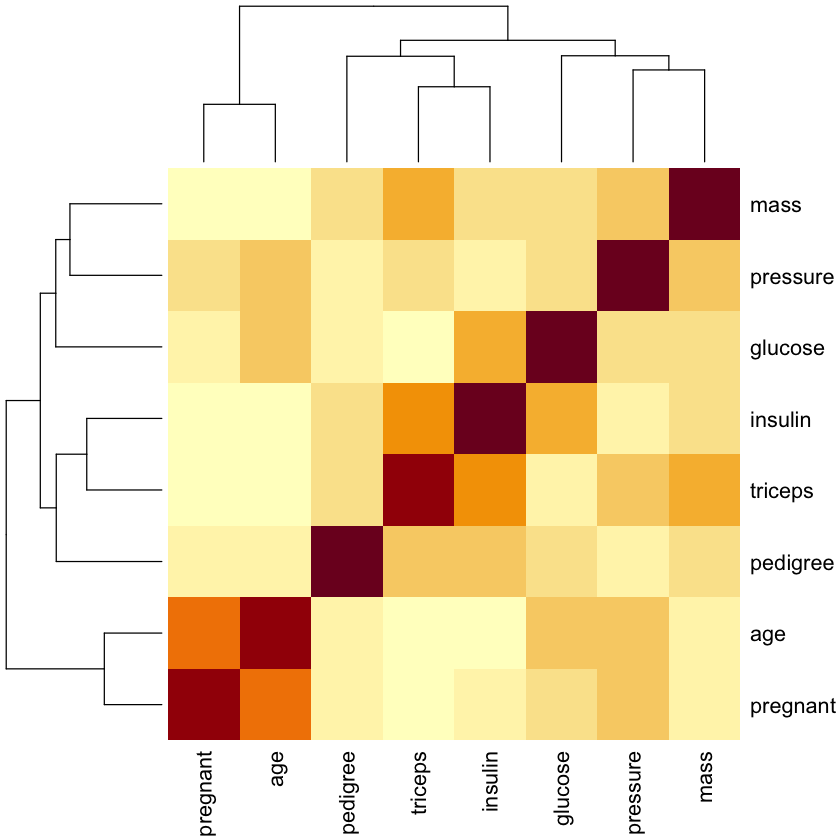

In [26]:
heatmap(corr_maxtrix)

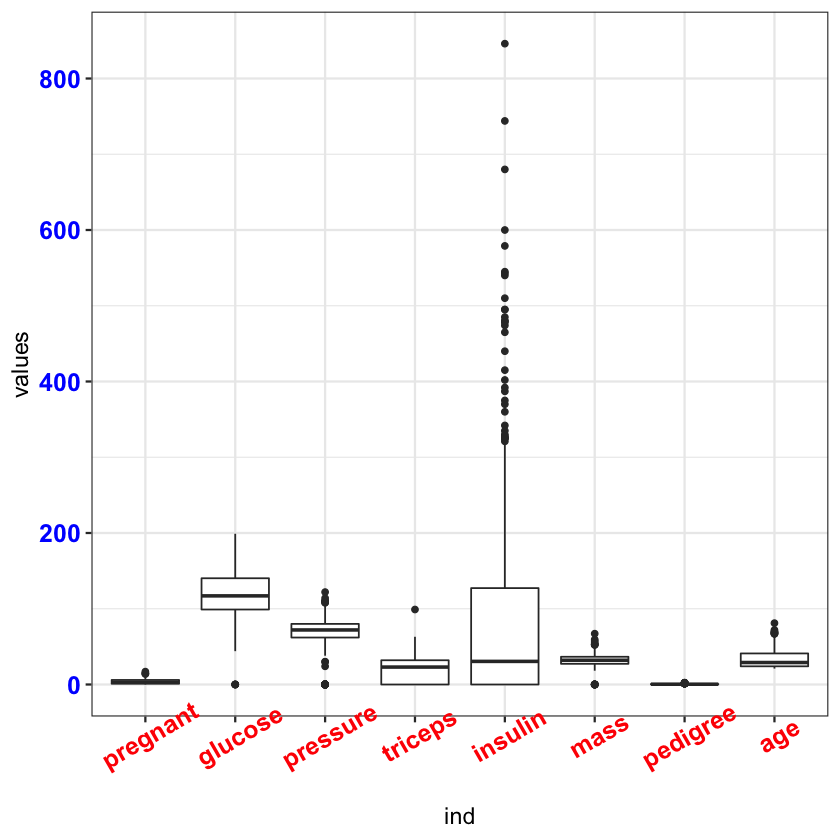

In [33]:
plot = ggplot(stack(df[, 1:8]), aes(x = ind, y = values)) + 
        geom_boxplot() + theme_bw(base_size = 14) +
        theme(axis.text.x = element_text(face = 'bold', color = 'red', size = 15, angle =30),
              axis.text.y = element_text(face = 'bold', color = 'blue', size = 15))
plot

Dữ liệu hầu như có outliers ở tất cả các features, trong đó insulin có nhiều outliers nhất

In [93]:
cols = colnames(df[, 1:8])
q = c(0.05, 0.15, 0.25, 0.50, 0.75, 0.90)
result = data.frame()

for (i in 1:8) {
    temp = data.frame(t(quantile(df[,i], q)), row.names=cols[i])
    result = rbind(result, temp)
}
colnames(result) = q
result = data.frame(t(result))
result

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.05,0,79.00,38.7,0,0.00,21.800,0.14035,21
0.15,1,91.00,58.0,0,0.00,24.805,0.19210,22
0.25,1,99.00,62.0,0,0.00,27.300,0.24375,24
0.5,3,117.00,72.0,23,30.50,32.000,0.37250,29
0.75,6,140.25,80.0,32,127.25,36.600,0.62625,41
0.9,9,167.00,88.0,40,210.00,41.500,0.87860,51


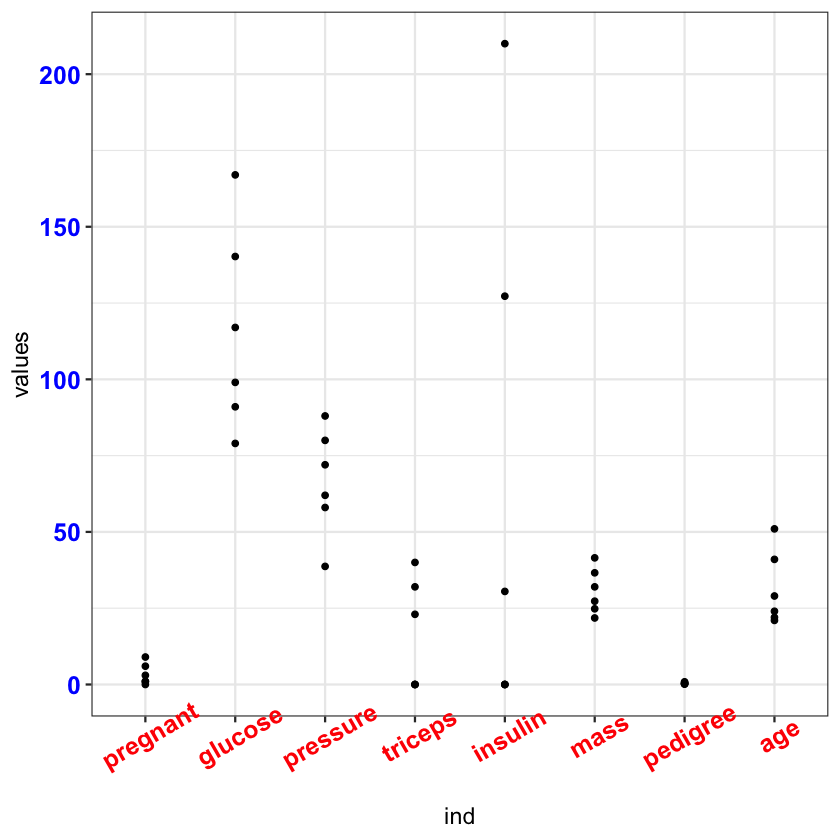

In [105]:
plot = ggplot(stack(result[,1:8]), aes(x = ind, y = values)) + 
        geom_point() + theme_bw(base_size = 14) +
        theme(axis.text.x = element_text(face = 'bold', color = 'red', size = 15, angle =30),
              axis.text.y = element_text(face = 'bold', color = 'blue', size = 15))
plot

# Ex 2-1

In [121]:
df_ = read.csv('../Du_lieu/life_batteries.txt', sep='\t', header=FALSE)
head(df_)

,V1,V2,V3,V4
,<int>,<int>,<int>,<int>
1,130,145,126,146
2,164,130,132,152
3,145,129,133,155
4,140,127,139,137
5,131,126,145,148
6,125,132,126,126


In [124]:
df = c(df_$V1, df_$V2, df_$V3, df_$V4)
df

[1] 130 164 145 140 131 125 126 147 156 132 145 130 129 127 126 132 135 136 146
[20] 142 126 132 133 139 145 126 131 129 130 132 146 152 155 137 148 126 129 136
[39] 146 132

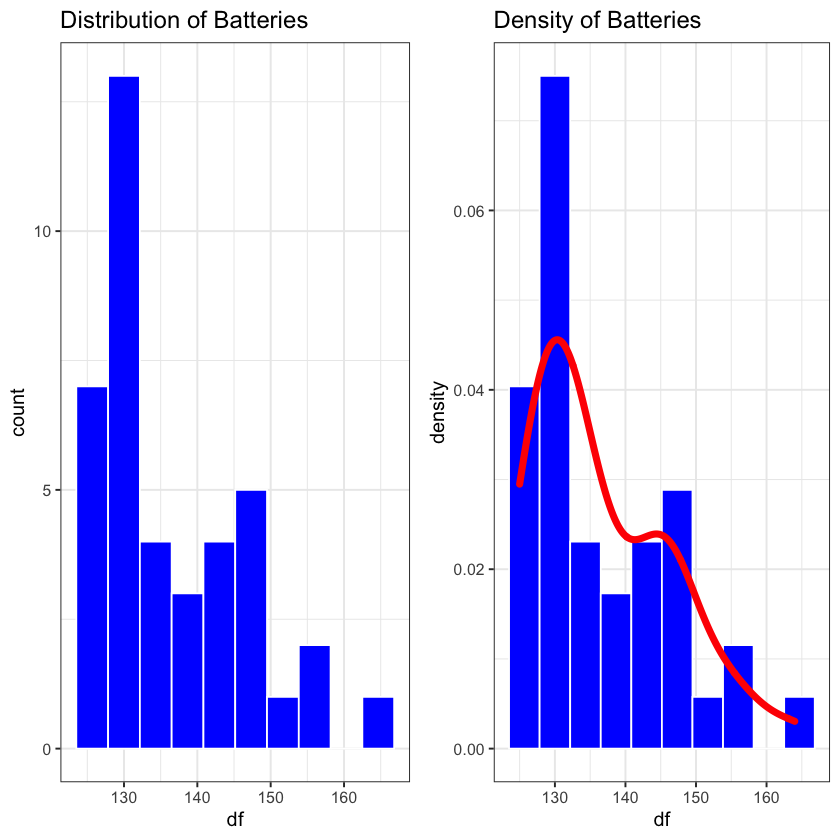

In [135]:
p = ggplot(data.frame(df), aes(df))
p1 = p + geom_histogram(bins = 10, color = 'white', fill = 'blue') +
     ggtitle("Distribution of Batteries") +
     theme_bw(base_size = 12)

p2 = p + geom_histogram(aes(y=..density..), bins = 10, color = 'white', fill = 'blue') +
     geom_density(col = 'red', lwd=2) + 
     ggtitle("Density of Batteries") +
     theme_bw(base_size = 12)

grid.arrange(p1, p2, ncol = 2)

Nhận xét:
- Phân phối lệch trái
- Batteries life trung bình tầm 130
- Có 1 ít outliers > 160

In [136]:
summary(df)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  125.0   129.8   132.5   136.8   145.0   164.0 

In [137]:
var(df)

[1] 95.87436

In [138]:
sd(df)

[1] 9.791545

In [139]:
skewness(df)

[1] 0.8140204

In [140]:
kurtosis(df)

[1] -0.2204983

# Ex 2-2

In [141]:
df2_ = read.csv('../Du_lieu/life_batteries_2.txt', sep='\t', header=FALSE)
head(df2_)

,V1,V2,V3,V4
,<int>,<int>,<int>,<int>
1,134,130,140,151
2,143,134,136,144
3,150,135,160,141
4,143,140,138,141
5,148,146,140,146
6,151,138,151,139


In [142]:
df2 = c(df2_$V1, df2_$V2, df2_$V3, df2_$V4)
df2

[1] 134 143 150 143 148 151 151 152 142 122 130 134 135 140 146 138 128 142 146
[20] 134 140 136 160 138 140 151 146 144 142 145 151 144 141 141 146 139 147 134
[39] 136 147

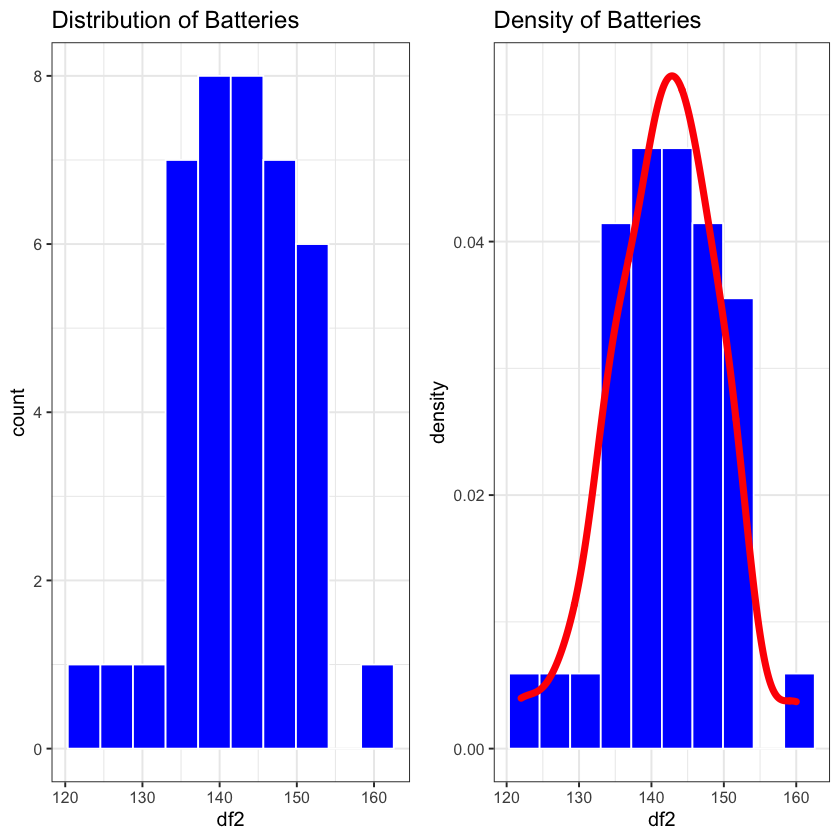

In [143]:
p = ggplot(data.frame(df2), aes(df2))
p1 = p + geom_histogram(bins = 10, color = 'white', fill = 'blue') +
     ggtitle("Distribution of Batteries") +
     theme_bw(base_size = 12)

p2 = p + geom_histogram(aes(y=..density..), bins = 10, color = 'white', fill = 'blue') +
     geom_density(col = 'red', lwd=2) + 
     ggtitle("Density of Batteries") +
     theme_bw(base_size = 12)

grid.arrange(p1, p2, ncol = 2)

Nhận xét:
- Dữ liệu batteries life 2 cân hơn, và không bị lệch trái như dữ liệu 1
- Life batteries trung bình cao hơn, khoảng 140 so với dữ liệu 1
- Độ phân tán có vẻ thấp hơn

In [144]:
summary(df2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  122.0   137.5   142.0   141.9   146.2   160.0 

In [145]:
var(df2)

[1] 55.19936

In [146]:
sd(df2)

[1] 7.429627

In [147]:
skewness(df2)

[1] -0.2416792

In [148]:
kurtosis(df2)

[1] 0.1909656

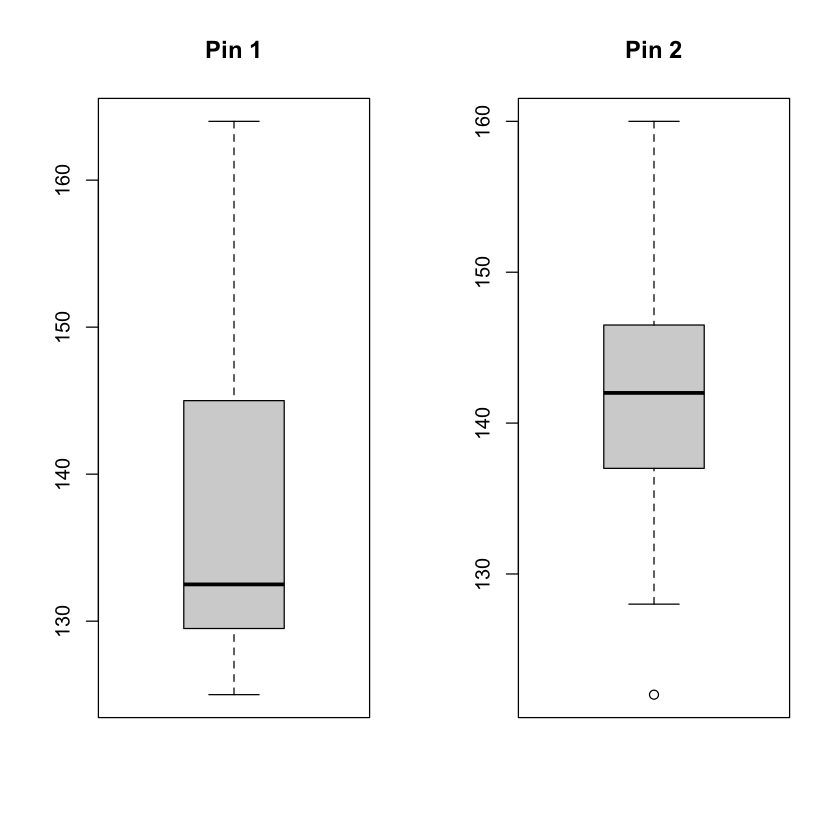

In [149]:
par(mfrow=c(1, 2))
boxplot(df, main='Pin 1')
boxplot(df2, main='Pin 2')

# Ex 3

In [158]:
df = read.xlsx('../Du_lieu/students.xls', sheetName='Full')
head(df)

,ID,Last.Name,First.Name,City,State,Gender,Student.Status,Major,Country,Age,⋯,NA..12,NA..13,NA..14,NA..15,NA..16,NA..17,NA..18,NA..19,NA..20,NA..21
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1,DOE01,JANE01,Los Angeles,California,Female,Graduate,Politics,US,30,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,DOE02,JANE02,Sedona,Arizona,Female,Undergraduate,Math,US,19,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,DOE01,JOE01,Elmira,New York,Male,Graduate,Math,US,26,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,DOE02,JOE02,Lackawana,New York,Male,Graduate,Econ,US,33,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,DOE03,JOE03,Defiance,Ohio,Male,Graduate,Econ,US,37,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,DOE04,JOE04,Tel Aviv,Israel,Male,Graduate,Econ,Israel,25,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [159]:
df = df[colSums(!is.na(df)) > 0]
df = na.omit(df)
df = df[, 4:14]
df

,City,State,Gender,Student.Status,Major,Country,Age,SAT,Average.score..grade.,Height..in.,Newspaper.readership..times.wk.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Los Angeles,California,Female,Graduate,Politics,US,30,2263,67.00000,61,5
2,Sedona,Arizona,Female,Undergraduate,Math,US,19,2006,63.00000,64,7
3,Elmira,New York,Male,Graduate,Math,US,26,2221,78.11328,73,6
4,Lackawana,New York,Male,Graduate,Econ,US,33,1716,77.80859,68,3
5,Defiance,Ohio,Male,Graduate,Econ,US,37,1701,65.00000,71,6
6,Tel Aviv,Israel,Male,Graduate,Econ,Israel,25,1786,69.00000,67,5
7,Cimax,North Carolina,Male,Graduate,Politics,US,39,1577,95.88251,70,5
8,Liberal,Kansas,Female,Undergraduate,Politics,US,21,1842,87.00000,62,5
9,Montreal,Canada,Female,Undergraduate,Math,Canada,18,1813,91.00000,62,6


In [160]:
summary(df)

     City              State              Gender          Student.Status    
 Length:30          Length:30          Length:30          Length:30         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Major             Country               Age            SAT      
 Length:30          Length:30          Min.   :18.0   Min.   :1338  
 Class :character   Class :character   1st Qu.:19.0   1st Qu.:1658  
 Mode  :character   Mode  :character   Median :23.0   Median :1817  
                                       Mean   :25.2   Mean   :1849  
                                       3rd Qu.:30.0   3rd Qu.:2032  
                                       Max.   :

In [161]:
str(df)

'data.frame':	30 obs. of  11 variables:
 $ City                           : chr  "Los Angeles" "Sedona" "Elmira" "Lackawana" ...
 $ State                          : chr  "California" "Arizona" "New York" "New York" ...
 $ Gender                         : chr  "Female" "Female" "Male" "Male" ...
 $ Student.Status                 : chr  "Graduate" "Undergraduate" "Graduate" "Graduate" ...
 $ Major                          : chr  "Politics" "Math" "Math" "Econ" ...
 $ Country                        : chr  "US" "US" "US" "US" ...
 $ Age                            : num  30 19 26 33 37 25 39 21 18 33 ...
 $ SAT                            : num  2263 2006 2221 1716 1701 ...
 $ Average.score..grade.          : num  67 63 78.1 77.8 65 ...
 $ Height..in.                    : num  61 64 73 68 71 67 70 62 62 66 ...
 $ Newspaper.readership..times.wk.: num  5 7 6 3 6 5 5 5 6 5 ...


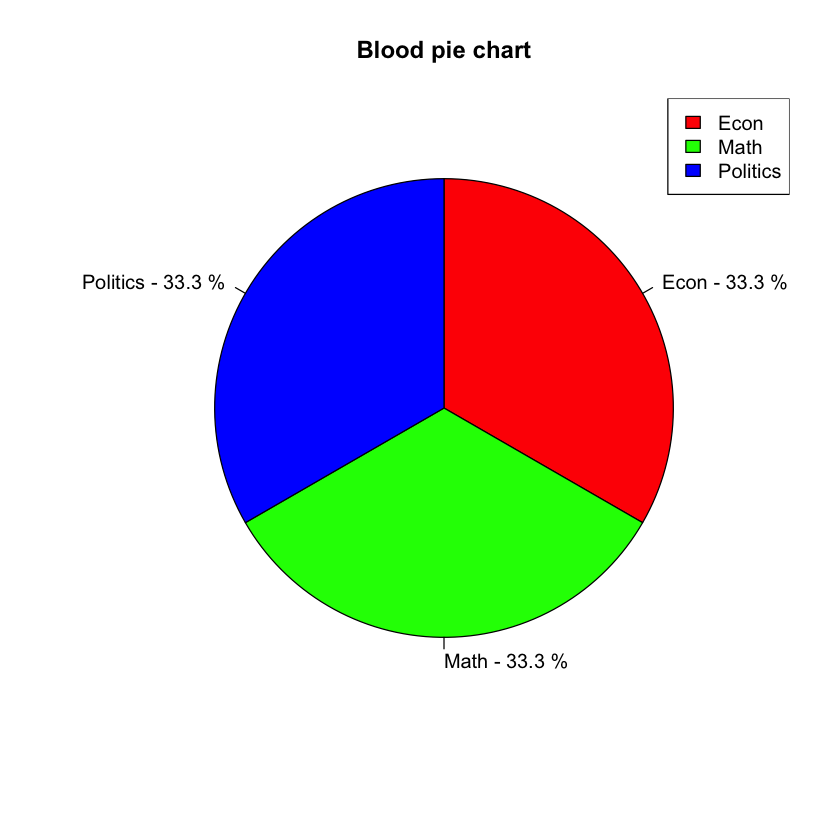

In [163]:
df_chart = as.data.frame(table(df$Major))

x = df_chart[, 2]
labels = as.vector(df_chart[, 1])
piepercent = round(100 * x/sum(x), 1)

pie(x, labels = paste(labels,'-', piepercent, "%"), 
    main = "Blood pie chart",
   col = rainbow(length(x)),
   clockwise = TRUE)
legend("topright", labels, cex = 1, fill = rainbow(length(x)))

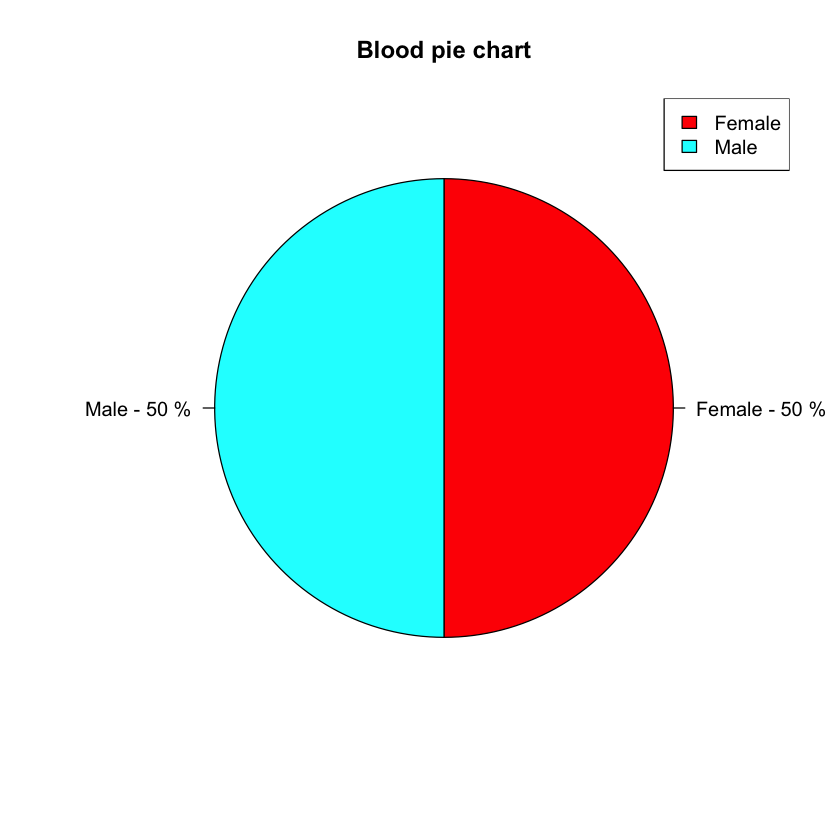

In [164]:
df_chart = as.data.frame(table(df$Major))

x = df_chart[, 2]
labels = as.vector(df_chart[, 1])
piepercent = round(100 * x/sum(x), 1)

pie(x, labels = paste(labels,'-', piepercent, "%"), 
    main = "Blood pie chart",
   col = rainbow(length(x)),
   clockwise = TRUE)
legend("topright", labels, cex = 1, fill = rainbow(length(x)))

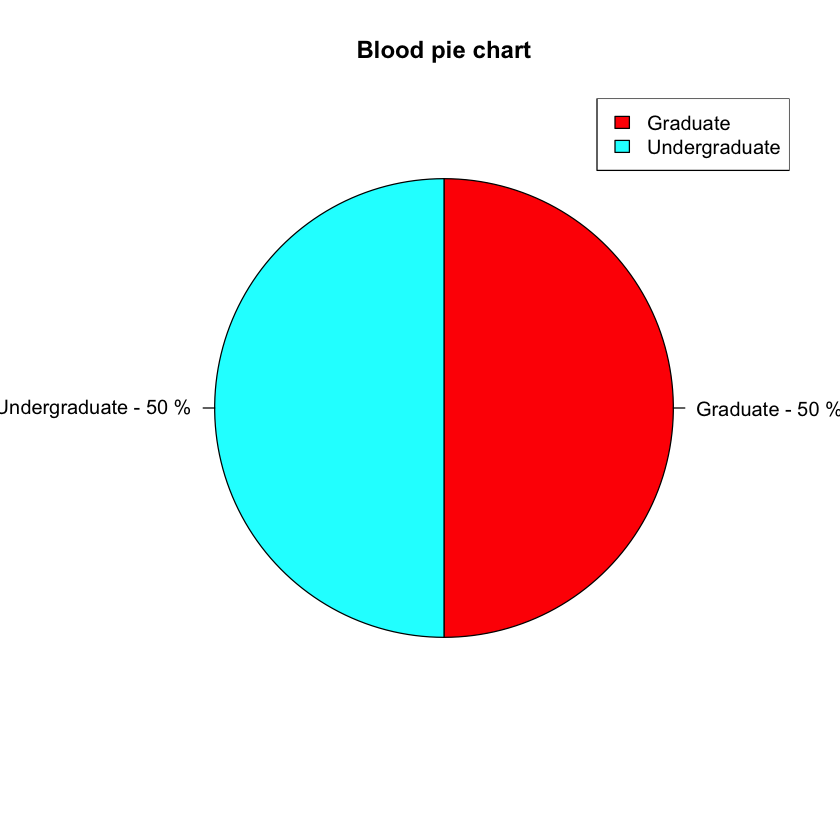

In [166]:
df_chart = as.data.frame(table(df$Student.Status))

x = df_chart[, 2]
labels = as.vector(df_chart[, 1])
piepercent = round(100 * x/sum(x), 1)

pie(x, labels = paste(labels,'-', piepercent, "%"), 
    main = "Blood pie chart",
   col = rainbow(length(x)),
   clockwise = TRUE)
legend("topright", labels, cex = 1, fill = rainbow(length(x)))

In [168]:
print(sapply(df[7:11], var))

                            Age                             SAT 
                      47.200000                    75686.713793 
          Average.score..grade.                     Height..in. 
                     102.130104                       21.702299 
Newspaper.readership..times.wk. 
                       1.636782 


In [169]:
print(sapply(df[7:11], skewness))

                            Age                             SAT 
                     0.50270966                      0.14044713 
          Average.score..grade.                     Height..in. 
                    -0.10137424                      0.15508544 
Newspaper.readership..times.wk. 
                    -0.04683474 


In [170]:
print(sapply(df[7:11], kurtosis))

                            Age                             SAT 
                      -1.202428                       -1.042817 
          Average.score..grade.                     Height..in. 
                      -1.156974                       -1.215848 
Newspaper.readership..times.wk. 
                      -1.141655 


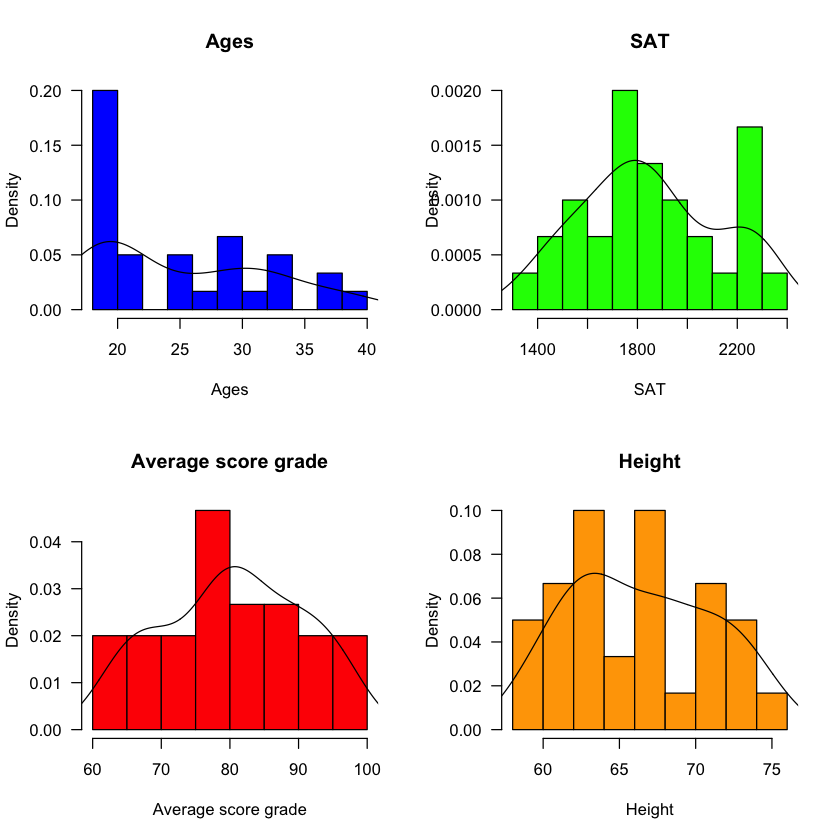

In [180]:
par(mfrow=c(2, 2))
hist(df$Age, main='Ages', xlab='Ages', col='blue', breaks=10, las=1, freq=FALSE)
lines(density(df$Age))
hist(df$SAT, main='SAT', xlab='SAT', col='green', breaks=10, las=1, freq=FALSE)
lines(density(df$SAT))
hist(df$Average.score..grade., xlab='Average score grade', main='Average score grade', col='red', breaks=10, las=1, freq=FALSE)
lines(density(df$Average.score..grade.))
hist(df$Height..in., main='Height', xlab='Height', col='orange', breaks=10, las=1, freq=FALSE)
lines(density(df$Height..in.))